# MNIST Data set using Tensorflow CNN

In [1]:
# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import tensorflow as tf


In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_labels = df_train['label']
df_images = df_train.iloc[:,1:]

# Looking at the Data

In [3]:
df_labels.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [4]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_train.shape

(42000, 785)

In [6]:
x_train = (df_train.ix[:,1:].values).astype('float32') # all pixel values
y_train = df_train.ix[:,0].values.astype('int32') # only labels i.e targets digits

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


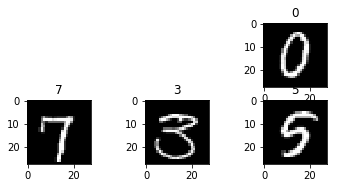

In [7]:
x_train = x_train.reshape(x_train.shape[0], 28, 28)

for i in range(5, 9):
    plt.subplot(330 + (i+1))
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.title(y_train[i]);

In [8]:
x_train = df_train.iloc[:,1:].values
x_train = x_train.reshape(x_train.shape[0], 28, 28) #reshape to rectangular
x_train = x_train/255 #pixel values are 0 - 255 - this makes puts them in the range 0 - 1

In [ ]:
img = x_train[27]

In [10]:
def show(img):
    plt.imshow(img, cmap = "gray", interpolation = "none")

In [11]:
rand_img = np.random.randint(0, 255, (28, 28))
rand_img = rand_img/255.0

In [12]:
rand_direction = np.random.rand(28, 28) 

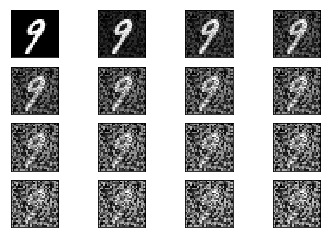

In [13]:
for i in range(16):
    plt.subplot(4,4,i+1)
    show(img + i/4*rand_direction)    
    plt.xticks([])
    plt.yticks([])

In [14]:
for digit_num, num in enumerate(neighbors[:36]):
    plt.subplot(6,6,digit_num+1)
    grid_data = X_train[num]  # reshape from 1d to 2d pixel array
    show(grid_data)
    plt.xticks([])
    plt.yticks([])

NameError: name 'neighbors' is not defined

In [15]:
x_train = (df_train.ix[:,1:].values).astype('float32') # all pixel values
y_train = df_train.ix[:,0].values.astype('int32') # only labels i.e targets digits
x_test = df_test.values.astype('float32')

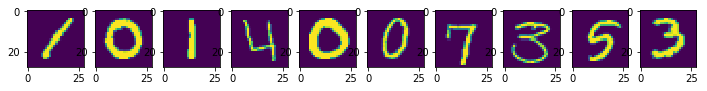

In [16]:
%matplotlib inline
# preview the images first
plt.figure(figsize=(12,10))
x, y = 10, 4
for i in range(10):  
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i].reshape((28,28)),interpolation='nearest')
plt.show()

In [17]:
x_train = x_train/255.0
x_test = x_test/255.0

In [18]:
X_train = x_train.reshape(x_train.shape[0], 28, 28,1)
X_test = x_test.reshape(x_test.shape[0], 28, 28,1)

In [19]:
from sklearn.model_selection import train_test_split
train_dataset, valid_dataset, train_labels, valid_labels = train_test_split(df_images, df_labels, test_size=0.33, random_state=42)

image_size = 28
num_labels = 10
num_channels = 1 # grayscale
from sklearn.model_selection import train_test_split
def reformat(dataset, labels):
  dataset = dataset.values.reshape(
    (-1, image_size, image_size, num_channels)).astype(np.float32)
  labels = (np.arange(num_labels) == labels[:,None]).astype(np.float32)
  return dataset, labels
train_dataset, train_labels = reformat(train_dataset, train_labels)
valid_dataset, valid_labels = reformat(valid_dataset, valid_labels)
test_dataset, test_labels = reformat(df_test,train_labels[:len(df_test)])
print('Training set', train_dataset.shape, train_labels.shape)
print('Validation set', valid_dataset.shape, valid_labels.shape)
print('Test set', test_dataset.shape, test_labels.shape)


Training set (28140, 28, 28, 1) (28140, 10)
Validation set (13860, 28, 28, 1) (13860, 10)
Test set (28000, 28, 28, 1) (28000, 1, 10)


In [20]:
batch_size = 16
patch_size = 5
depth = 16
num_hidden = 64
image_size = 28
num_labels = 10
num_channels = 1

graph = tf.Graph()

with graph.as_default():

  # Input data.
  tf_train_dataset = tf.placeholder(
    tf.float32, shape=(batch_size, image_size, image_size, num_channels))
  tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
  tf_valid_dataset = tf.constant(valid_dataset)
  tf_test_dataset = tf.constant(test_dataset)    
    
  # Variables.
  layer1_weights = tf.Variable(tf.truncated_normal(
      [patch_size, patch_size, num_channels, depth], stddev=0.1))
  layer1_biases = tf.Variable(tf.zeros([depth]))
  layer2_weights = tf.Variable(tf.truncated_normal(
      [patch_size, patch_size, depth, depth], stddev=0.1))
  layer2_biases = tf.Variable(tf.constant(1.0, shape=[depth]))
  layer3_weights = tf.Variable(tf.truncated_normal(
      [image_size // 4 * image_size // 4 * depth, num_hidden], stddev=0.1))
  layer3_biases = tf.Variable(tf.constant(1.0, shape=[num_hidden]))
  layer4_weights = tf.Variable(tf.truncated_normal(
      [num_hidden, num_labels], stddev=0.1))
  layer4_biases = tf.Variable(tf.constant(1.0, shape=[num_labels]))
  
  # Model.
  def model(data):
    conv = tf.nn.conv2d(data, layer1_weights, [1, 2, 2, 1], padding='SAME')
    hidden = tf.nn.relu(conv + layer1_biases)
    conv = tf.nn.conv2d(hidden, layer2_weights, [1, 2, 2, 1], padding='SAME')
    hidden = tf.nn.relu(conv + layer2_biases)
    shape = hidden.get_shape().as_list()
    reshape = tf.reshape(hidden, [shape[0], shape[1] * shape[2] * shape[3]])
    hidden = tf.nn.relu(tf.matmul(reshape, layer3_weights) + layer3_biases)
    return tf.matmul(hidden, layer4_weights) + layer4_biases
  
  # Training computation.
  logits = model(tf_train_dataset)
  loss = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=tf_train_labels))
    
  # Optimizer.
  optimizer = tf.train.AdamOptimizer().minimize(loss)
  
  # Predictions for the training, validation, and test data.
  train_prediction = tf.nn.softmax(logits)
  valid_prediction = tf.nn.softmax(model(tf_valid_dataset))
  test_prediction = tf.nn.softmax(model(tf_test_dataset))


In [21]:
def accuracy(predictions, labels):
  return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])


In [22]:
num_steps = 10001

with tf.Session(graph=graph) as session:
  tf.global_variables_initializer().run()
  print('Initialized')
  for step in range(num_steps):
    offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
    batch_data = train_dataset[offset:(offset + batch_size), :, :, :]
    batch_labels = train_labels[offset:(offset + batch_size), :]
    feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
    _, l, predictions = session.run(
      [optimizer, loss, train_prediction], feed_dict=feed_dict)
    if (step % 1000 == 0):
      print('Minibatch loss at step %d: %f' % (step, l))
      print('Minibatch accuracy: %.1f%%' % accuracy(predictions, batch_labels))
      print('Validation accuracy: %.1f%%' % accuracy(
        valid_prediction.eval(), valid_labels))
  sub = np.argmax(test_prediction.eval(), 1)

Initialized
Minibatch loss at step 0: 76.216904
Minibatch accuracy: 6.2%
Validation accuracy: 10.4%
Minibatch loss at step 1000: 0.461939
Minibatch accuracy: 81.2%
Validation accuracy: 91.0%
Minibatch loss at step 2000: 0.155496
Minibatch accuracy: 93.8%
Validation accuracy: 94.5%
Minibatch loss at step 3000: 0.016065
Minibatch accuracy: 100.0%
Validation accuracy: 95.4%
Minibatch loss at step 4000: 0.003466
Minibatch accuracy: 100.0%
Validation accuracy: 96.0%
Minibatch loss at step 5000: 0.072675
Minibatch accuracy: 93.8%
Validation accuracy: 95.9%
Minibatch loss at step 6000: 0.081456
Minibatch accuracy: 100.0%
Validation accuracy: 96.0%
Minibatch loss at step 7000: 0.058738
Minibatch accuracy: 93.8%
Validation accuracy: 96.7%
Minibatch loss at step 8000: 0.006430
Minibatch accuracy: 100.0%
Validation accuracy: 96.6%
Minibatch loss at step 9000: 0.000066
Minibatch accuracy: 100.0%
Validation accuracy: 96.9%
Minibatch loss at step 10000: 0.008937
Minibatch accuracy: 100.0%
Validation

In [ ]:
output = pd.DataFrame({'Label': sub })
output.index += 1 
output.index.name = 'ImageId'
output.head()
output.to_csv('sub.csv')